In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [17]:
# dataset
df = pd.read_csv("./data/BTC-Daily.csv")
df = df.drop_duplicates()

In [18]:
df["date"] = pd.to_datetime(df["date"])
date_range = str(df["date"].dt.date.min()) + " to " + str(df["date"].dt.date.max())

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

unique_years = df["year"].unique()
for year in unique_years:
    dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq="D")
    year_month_day = pd.DataFrame({"date": dates})
    year_month_day["year"] = year_month_day["date"].dt.year
    year_month_day["month"] = year_month_day["date"].dt.month
    year_month_day["day"] = year_month_day["date"].dt.day

    merged_data = pd.merge(year_month_day, df, on=["year", "month", "day"], how="left")

In [19]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25


In [20]:
X = df[["open", "low", "high"]].values
y = df["close"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [23]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

y_pred = linear_regressor.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error( y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,4)}")
print(f"Mean Absolute Error: {round(mae,4)}")
print(f"R2 Score: {round(r2,4)}")

Mean Squared Error: 114200.2975
Mean Absolute Error: 143.9742
R2 Score: 0.9996


/Users/vychan/Coding/AIO2025/Code/aio2025_study/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vychan/Coding/AIO2025/Code/aio2025_study/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vychan/Coding/AIO2025/Code/aio2025_study/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


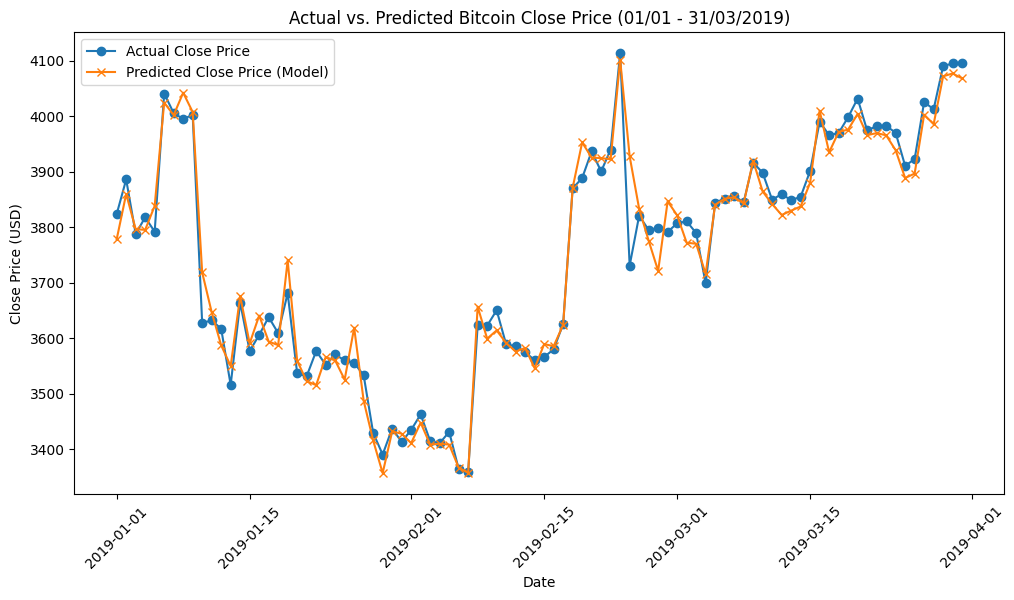

In [25]:
df_2019_Q1 = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2019-03-31")].copy()

X_2019 = df_2019_Q1[["open", "low", "high"]].values
X_2019_scaled = scalar.transform(X_2019)  # dùng scalar đã fit trước đó
y_2019 = df_2019_Q1["close"].values

y_pred_2019 = linear_regressor.predict(X_2019_scaled)
df_2019_Q1["predicted_close"] = y_pred_2019

plt.figure(figsize=(12, 6))
plt.plot(
    df_2019_Q1["date"], df_2019_Q1["close"], label="Actual Close Price", marker="o"
)
plt.plot(
    df_2019_Q1["date"],
    df_2019_Q1["predicted_close"],
    label="Predicted Close Price (Model)",
    marker="x",
)
plt.title("Actual vs. Predicted Bitcoin Close Price (01/01 - 31/03/2019)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()